<a href="https://colab.research.google.com/github/andresfelipebarragannino6-ai/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes/blob/main/desafio_telecom_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Desafío Telecom X – Análisis ETL y EDA

**Autor:**  Andrés Felipe Barragán Niño

**Fecha:**  12 de enero, 2026.

## Objetivo
Analizar los datos de clientes de Telecom X para identificar patrones de comportamiento y
factores asociados al churn, a través de un proceso ETL y análisis exploratorio de datos. **texto en negrita**
**texto en negrita**

# **Extracción**

### Importación de librerías y configuración del entorno

Este bloque inicializa el **entorno de trabajo del proyecto**, incorporando las librerías necesarias para la **extracción de datos desde la API**, el **análisis y manipulación de datos**, y la **visualización de resultados**.  
Además, se establecen configuraciones estándar para gráficos y para la visualización de DataFrames en pandas, con el fin de garantizar **claridad, consistencia y legibilidad** a lo largo de todo el análisis.

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Este código permite leer el archivo TelecomX_Data.json, cargar su contenido en memoria y transformarlo en una estructura tabular (DataFrame) que facilita el análisis y la manipulación de los datos. Se utiliza un bloque try-except para controlar errores comunes, como la ausencia del archivo, evitando que el programa se detenga inesperadamente y mostrando un mensaje claro al usuario en caso de fallo. Si la carga se realiza correctamente, se confirma mediante un mensaje en pantalla.

In [ ]:
try:

  with open('TelecomX_Data.json', 'r') as file:
    data = json.load(file)

  df_telecom = pd.json_normalize(data)
  print("Cargado correctamente")

except FileNotFoundError:
    print("El archivo no se encuentra. Asegúrate de subir 'TelecomX_Data.json' al entorno.")

Cargado correctamente


### Carga de datos en un DataFrame

En esta sección se transforman los datos obtenidos en formato JSON a un **DataFrame de pandas**, facilitando su manipulación y análisis.  
Se contempla tanto el caso de una lista de registros como el de un objeto JSON anidado, asegurando flexibilidad en la carga.  
La visualización de las primeras filas permite una **verificación rápida de la estructura y contenido** del dataset.

In [ ]:
df_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Estas líneas de código permiten obtener una visión general del DataFrame df_telecom, mostrando cuántas filas y columnas contiene, qué tipo de datos tiene cada variable y si existen valores nulos. Esto es fundamental para evaluar la calidad de los datos y tomar decisiones sobre limpieza, transformación o análisis posterior.

In [ ]:
print("Dimensiones:", df_telecom.shape)

Dimensiones: (7267, 21)


In [ ]:
df_telecom.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

##**Creando la columna de cuentas diarias:**

Estas líneas calculan el costo diario aproximado de cada cuenta a partir del cargo mensual y lo almacenan en una nueva columna llamada Cuentas_diarias. Posteriormente, se muestran las últimas filas del DataFrame para comprobar que el cálculo y la creación de la nueva columna se realizaron correctamente.

In [ ]:
df_telecom['Cuentas_diarias'] = df_telecom['account.Charges.Monthly'] / 30

In [ ]:
df_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


##**Transformación**

**4. Transformación de datos**

Se crean variables derivadas y se preparan los datos para el análisis exploratorio.

**1) Variable objetivo: churn**


Primero, aseguramos que la variable de churn esté bien definida y tipada.

In [ ]:
print("Valores de 'Churn' antes de manejar nulos:")
print(df_telecom["Churn"].value_counts(dropna=False))

df_telecom.dropna(subset=['Churn'], inplace=True)

print("\nValores de 'Churn' después de manejar nulos:")
print(df_telecom["Churn"].value_counts(dropna=False))

Valores de 'Churn' antes de manejar nulos:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores de 'Churn' después de manejar nulos:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


**2) Crear variables derivadas clave**

***a) Crear variables derivadas clave***

In [ ]:
df_telecom["Cuentas_diarias"] = df_telecom["account.Charges.Monthly"] / 30

***b) Antigüedad categorizada (tenure buckets)***

In [ ]:
df_telecom["tenure_group"] = pd.cut(
    df_telecom["customer.tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "13-24", "25-48", "49+"]
)

**3) Transformar variables categóricas relevantes**

***Ejemplo: tipo de contrato, método de pago, servicio de internet.***

In [ ]:
key_categoricals = [
    "account.Contract",
    "account.PaymentMethod",
    "internet.InternetService"
]

for col in key_categoricals:
    print(df_telecom[col].value_counts())

account.Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64
account.PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


**4) Crear indicadores de servicios (servicios activos)**

In [ ]:
service_cols = [
    "phone.PhoneService", "phone.MultipleLines", "internet.OnlineSecurity",
    "internet.OnlineBackup", "internet.DeviceProtection",
    "internet.TechSupport", "internet.StreamingTV", "internet.StreamingMovies"
]

df_telecom["active_services_count"] = df_telecom[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

**5) Dataset final para análisis**

***Seleccionamos variables clave (sin eliminar todavía columnas, solo orden lógico):***

In [ ]:
df_eda = df_telecom.copy()
df_eda.tail(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias,tenure_group,active_services_count
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667,0-12,2
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667,49+,5
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6,1.966667,49+,5


**Conclusión**

**Transformación de datos:**  
Se crearon variables derivadas relevantes para el análisis de churn, incluyendo
indicadores de antigüedad, cargos promedio y cantidad de servicios activos.
El dataset final fue preparado y almacenado para su uso en el análisis exploratorio.

##**Monstrar los datos descriptivos**

In [ ]:
df_telecom.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,Cuentas_diarias,active_services_count
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157337,3.358745
std,0.369074,24.571773,30.129572,1.004319,2.062729
min,0.000000,0.000000,18.250000,0.608333,0.000000
25%,0.000000,9.000000,35.425000,1.180833,1.000000
50%,0.000000,29.000000,70.300000,2.343333,3.000000
75%,0.000000,55.000000,89.875000,2.995833,5.000000
max,1.000000,72.000000,118.750000,3.958333,8.000000


##**Generar datos nuevos normalizados (archivo tipo csv):**

In [ ]:
df_telecom.to_csv('TelecomX_Normalizados_Data.csv', index=False)

print("¡Archivo 'TelecomX_Normalizados_Data.csv' guardado exitosamente!")

¡Archivo 'TelecomX_Normalizados_Data.csv' guardado exitosamente!


In [ ]:
import pandas as pd
from datetime import datetime

fecha_hoy = datetime.now().strftime("%Y-%m-%d")

nombre_archivo_datos = f"TelecomX_Normalizados_Data_{fecha_hoy}.csv"

df_telecom.to_csv(nombre_archivo_datos, index=False)

print(f"¡Archivo '{nombre_archivo_datos}' guardado exitosamente!")

df_reporte = (
    df_telecom
    .groupby('Churn', as_index=False)
    .agg(
        Cantidad_Clientes = ('Churn', 'count'),
        Pago_Promedio = ('account.Charges.Monthly', 'mean'),
        Total_Gastado = ('account.Charges.Total', 'sum'),
        Cuentas_Diarias = ('Cuentas_diarias', 'mean')
    )
)

df_reporte['Cuentas_Diarias'] = df_reporte['Cuentas_Diarias'].round(2)
df_reporte['Pago_Promedio'] = df_reporte['Pago_Promedio'].round(2)

nombre_archivo_reporte = f'TelecomX_Reporte_Churn_{fecha_hoy}.csv'
df_reporte.to_csv(nombre_archivo_reporte, index=False)

print(f"✅ Reporte CSV generado: {nombre_archivo_reporte}")

display(df_reporte)

¡Archivo 'TelecomX_Normalizados_Data_2026-01-12.csv' guardado exitosamente!
✅ Reporte CSV generado: TelecomX_Reporte_Churn_2026-01-12.csv


,Churn,Cantidad_Clientes,Pago_Promedio,Total_Gastado,Cuentas_Diarias
0,,224,63.41,929.31355.11696.2287.856792.4517822510.2651.52...,2.11
1,No,5174,61.27,593.3542.4571.457904.255377.8340.355957.92460....,2.04
2,Yes,1869,74.44,280.851237.85267.42791.525.11215.676.3530.591....,2.48


# Carga y análisis

##**Graficos que permiten analizar los datos:**

## 5. Análisis Exploratorio de Datos (EDA)

Se exploran distribuciones, relaciones entre variables y patrones relevantes
relacionados con el churn y el comportamiento del cliente.

***1) Estadísticas descriptivas generales***

### Estadísticas descriptivas generales

Las estadísticas descriptivas permiten obtener una **visión global del dataset**, identificando la distribución, tendencia central y dispersión de las variables numéricas.

En general, los datos muestran una **alta heterogeneidad en la antigüedad de los clientes y en los cargos mensuales**, lo que sugiere distintos perfiles de consumo. Se observan valores mínimos y máximos bien definidos, sin evidencias iniciales de rangos ilógicos, aunque existen diferencias relevantes entre clientes de corta y larga permanencia.

Este análisis preliminar establece la base para explorar **relaciones más profundas con el churn** y orientar el análisis hacia variables con mayor variabilidad e impacto potencial.

In [ ]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
customer.tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
account.Charges.Monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
Cuentas_diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333
active_services_count,7267.0,3.358745,2.062729,0.000000,1.000000,3.000000,5.000000,8.000000


### Churn rate general

El churn rate general representa la **proporción de clientes que han abandonado el servicio** respecto al total de clientes analizados.

El valor observado indica que una **parte significativa de la base de clientes presenta riesgo de evasión**, confirmando que el churn es un problema relevante para Telecom X. Esta métrica funciona como **línea base** para comparar el comportamiento de distintos segmentos y evaluar qué variables incrementan o reducen la probabilidad de abandono en los análisis posteriores.

In [ ]:
churn_rate = df_eda["Churn"].map({'Yes': 1, 'No': 0}).mean()
print(f"Churn rate general: {churn_rate:.2%}")

Churn rate general: 26.54%


Conteo de Churn post-limpieza:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


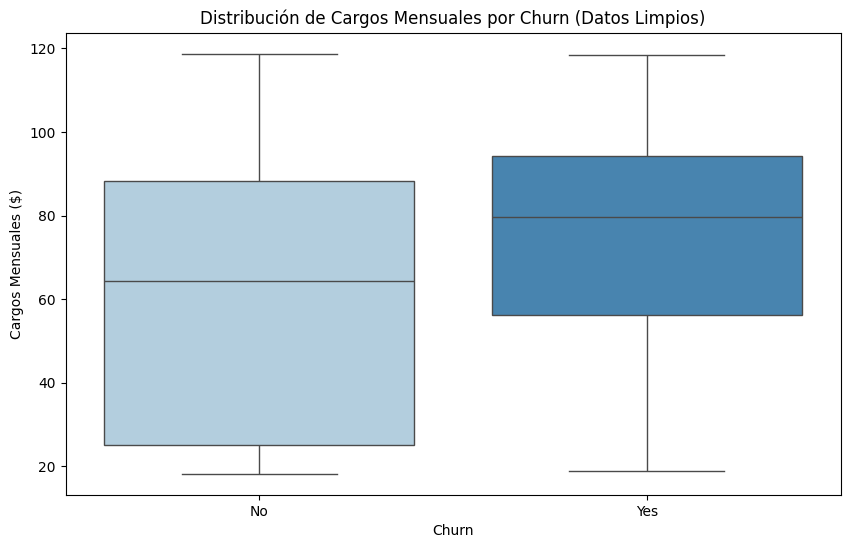


Promedio de pago mensual real:
Churn
No     61.265124
Yes    74.441332
Name: account.Charges.Monthly, dtype: float64


In [ ]:
# LIMPIEZA FINAL DE LA VARIABLE OBJETIVO CHURN

# 1. Eliminar filas donde Churn está vacío
df_telecom = df_telecom[df_telecom['Churn'] != '']

# Verificamos que ya no existan esos 224 fantasmas
print("Conteo de Churn post-limpieza:")
print(df_telecom['Churn'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Caja
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Churn',
    y='account.Charges.Monthly',
    hue='Churn',
    data=df_telecom,
    palette="Blues",
    legend=False
)
plt.title('Distribución de Cargos Mensuales por Churn (Datos Limpios)')
plt.ylabel('Cargos Mensuales ($)')
plt.show()

# Estadísticas finales limpias
print("\nPromedio de pago mensual real:")
print(df_telecom.groupby('Churn')['account.Charges.Monthly'].mean())

El gráfico indica que los clientes que hacen churn tienden a tener **cargos mensuales más altos** que aquellos que permanecen, ya que su mediana y rango intercuartílico están desplazados hacia valores superiores. En cambio, los clientes sin churn concentran más observaciones en cargos bajos, lo que sugiere que **precios más elevados están asociados con una mayor probabilidad de abandono**.


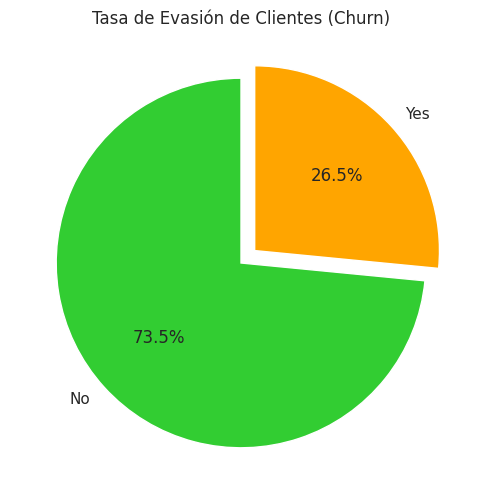

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(7, 6))
churn_counts = df_telecom[df_telecom['Churn'].isin(['No', 'Yes'])]['Churn'].value_counts()

plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    colors=['limegreen', 'Orange'],
    startangle=90,
    explode=(0, 0.1)
)

plt.title('Tasa de Evasión de Clientes (Churn)')
plt.show()

El gráfico muestra que la **tasa de churn es relativamente baja (26.5%)** frente a una **mayoría de clientes retenidos (73.5%)**, lo que indica una retención general sólida. Sin embargo, el hecho de que **aproximadamente uno de cada cuatro clientes abandone** sigue siendo significativo y justifica analizar los factores asociados al churn (como cargos mensuales u otros atributos) para reducir esa proporción y mejorar la estabilidad de la base de clientes.


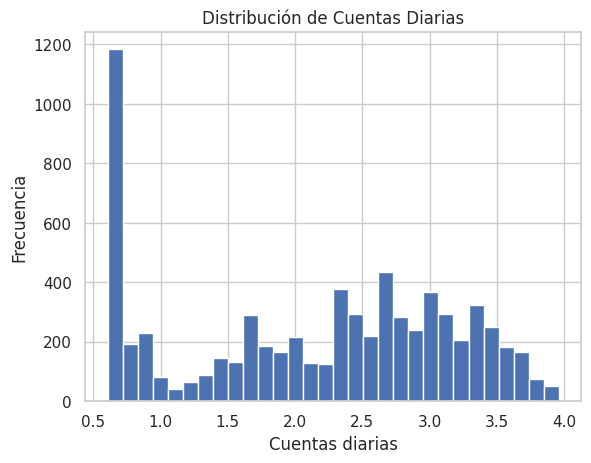

In [ ]:
plt.figure()
plt.hist(df_telecom['Cuentas_diarias'], bins=30)
plt.xlabel('Cuentas diarias')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cuentas Diarias')
plt.show()

El histograma muestra que las **cuentas diarias no se distribuyen de forma uniforme**, sino que presentan una **alta concentración en valores bajos** (especialmente cerca de 1) y una **mayor densidad entre 2 y 3.5**, con menos observaciones en los extremos. Esto sugiere la existencia de **distintos perfiles de uso**, donde una gran parte de los clientes tiene un consumo diario reducido, mientras que otro grupo relevante presenta un uso moderado–alto, lo cual puede ser clave para segmentar clientes y analizar su relación con métricas como ingresos o churn.


<Figure size 640x480 with 0 Axes>

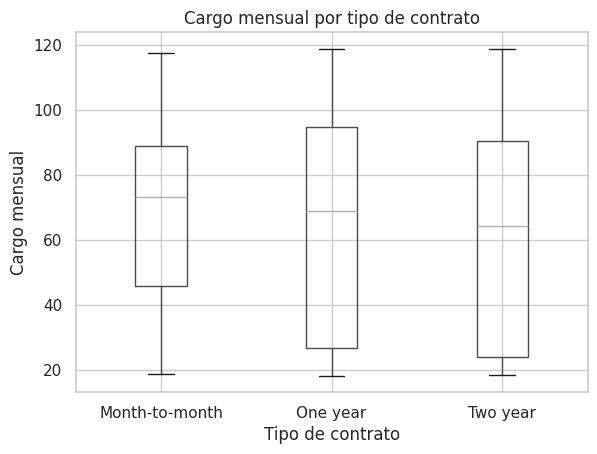

In [ ]:
plt.figure()
df_telecom.boxplot(column='account.Charges.Monthly', by='account.Contract')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cargo mensual')
plt.title('Cargo mensual por tipo de contrato')
plt.suptitle('')
plt.show()

A juzgar por el gráfico de cajas, existe una relación inversa entre la estabilidad del contrato y la mediana del cargo mensual, siendo los contratos de mes a mes los que presentan el costo central más elevado (aproximadamente 72). Sin embargo, es notable que los contratos a largo plazo (uno y dos años) muestran una mayor dispersión y variabilidad en sus cargos, reflejada en cajas más amplias que se extienden hacia valores mínimos mucho más bajos (cerca de 20) en comparación con el contrato mensual. Esto sugiere que, si bien el compromiso a largo plazo permite acceder a tarifas significativamente más económicas para un segmento de usuarios, también engloba una oferta de servicios más heterogénea que la del modelo de suscripción mensual.

##**Recuento de evasión por variables categóricas:**

<Figure size 640x480 with 0 Axes>

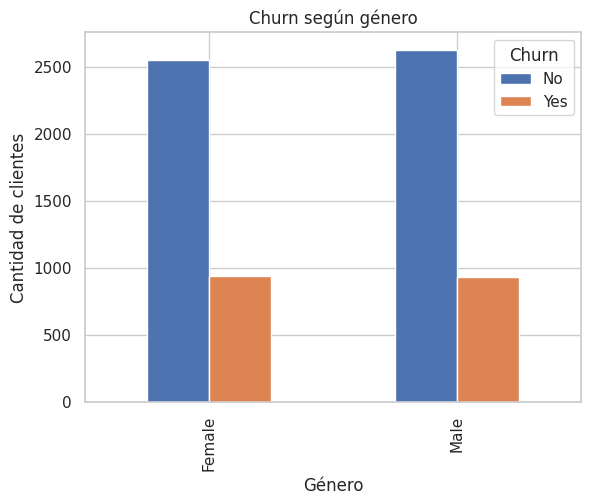

In [ ]:
plt.figure()
pd.crosstab(df_telecom['customer.gender'], df_telecom['Churn']).plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.title('Churn según género')
plt.show()

El gráfico de barras revela que el género no es un factor determinante en la deserción de clientes (churn), ya que la proporción entre quienes permanecen y quienes se van es prácticamente idéntica para hombres y mujeres. En ambos grupos, la vasta mayoría de los clientes (aproximadamente 2,500 por género) mantiene su servicio activo, mientras que una minoría similar (cerca de 900 por género) decide cancelarlo. Esta paridad estadística sugiere que las causas de abandono probablemente se encuentran en variables operativas o de servicio, como el tipo de contrato analizado anteriormente, y no en perfiles demográficos basados en el género.

<Figure size 640x480 with 0 Axes>

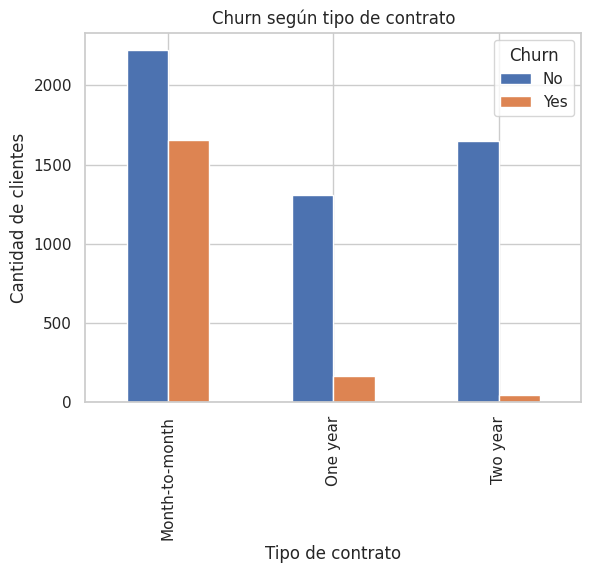

In [ ]:
plt.figure()
pd.crosstab(df_telecom['account.Contract'], df_telecom['Churn']).plot(kind='bar')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.title('Churn según tipo de contrato')
plt.show()

Al comparar ambas gráficas, se hace evidente que el tipo de contrato es un predictor de deserción mucho más potente que el género. Mientras que la tasa de churn se mantiene prácticamente idéntica entre hombres y mujeres (alrededor de 900 bajas por grupo), existe una correlación crítica entre la brevedad del contrato y el abandono: los clientes con contratos "mes a mes" presentan una deserción masiva (más de 1,500 casos), en contraste con los contratos a uno o dos años, donde la fuga de clientes es mínima. Esto sugiere que la estrategia de retención no debe enfocarse en segmentación demográfica, sino en incentivar la migración de usuarios hacia contratos de largo plazo para estabilizar la base de clientes.

<Figure size 640x480 with 0 Axes>

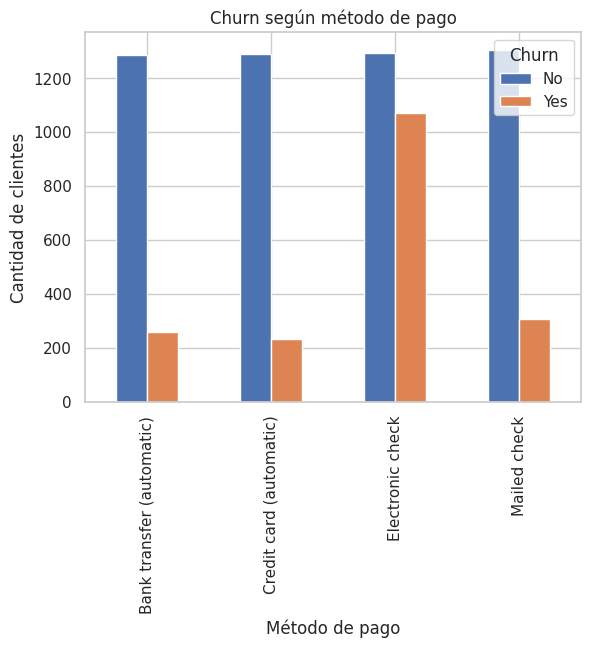

In [ ]:
plt.figure()
pd.crosstab(df_telecom['account.PaymentMethod'], df_telecom['Churn']).plot(kind='bar')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.title('Churn según método de pago')
plt.show()

Al integrar estas tres dimensiones, se observa que el perfil de cliente con mayor riesgo de abandono no está definido por el género, sino por la combinación de servicios de corto plazo y métodos de pago manuales. Mientras que el género muestra una distribución equitativa de bajas (aprox. 900 por grupo), el contrato mes a mes dispara la deserción por encima de los 1,500 casos, lo cual se correlaciona visualmente con el uso del cheque electrónico (Electronic check), el único método de pago donde la cantidad de bajas (más de 1,000) es casi tan alta como la de clientes que permanecen. En contraste, los métodos automáticos y los contratos a largo plazo presentan niveles de retención excepcionales. Esto indica que la fricción en el pago mensual, sumada a la falta de un compromiso contractual extendido, son los verdaderos catalizadores del churn.

<Figure size 640x480 with 0 Axes>

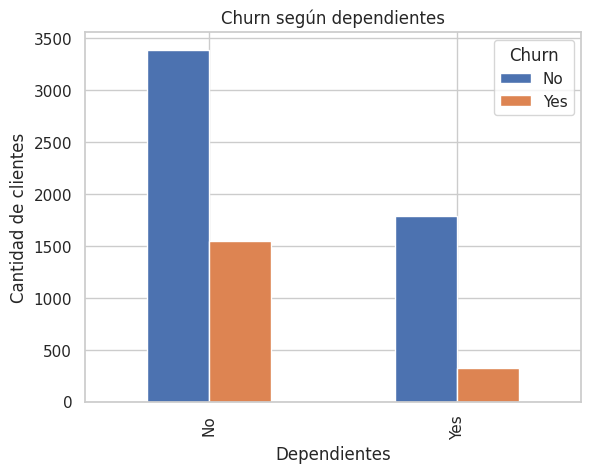

In [ ]:
plt.figure()
pd.crosstab(df_telecom['customer.Dependents'], df_telecom['Churn']).plot(kind='bar')
plt.xlabel('Dependientes')
plt.ylabel('Cantidad de clientes')
plt.title('Churn según dependientes')
plt.show()

El análisis integral revela que la deserción de clientes no está motivada por el género, el cual presenta una distribución de bajas equitativa, sino por la falta de arraigo contractual y financiero. El perfil de mayor riesgo se concentra en clientes sin dependientes que optan por contratos mes a mes y utilizan el cheque electrónico como método de pago, variables que muestran los niveles más críticos de abandono en sus respectivas categorías. En contraste, la estabilidad aumenta drásticamente en usuarios con contratos a largo plazo y pagos automatizados, lo que sugiere que la retención depende de convertir la relación transaccional de corto plazo en un compromiso financiero más sólido y automatizado.

<Figure size 640x480 with 0 Axes>

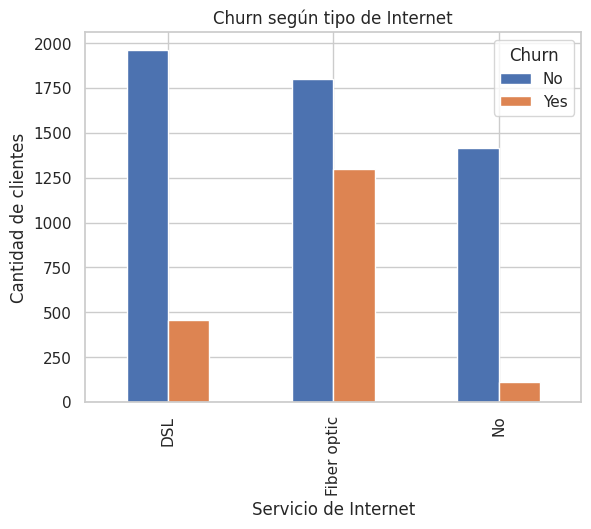

In [ ]:
plt.figure()
pd.crosstab(df_telecom['internet.InternetService'], df_telecom['Churn']).plot(kind='bar')
plt.xlabel('Servicio de Internet')
plt.ylabel('Cantidad de clientes')
plt.title('Churn según tipo de Internet')
plt.show()

El análisis integral confirma que la deserción no es una cuestión de género, sino de vulnerabilidad estructural y tecnológica. El perfil de alto riesgo se define por clientes sin dependientes, bajo contratos mensuales y con métodos de pago manuales como el cheque electrónico; a esto se suma un factor crítico en el servicio: el uso de fibra óptica, que presenta una tasa de abandono desproporcionadamente alta (casi 1,300 bajas) en comparación con el DSL. Esta combinación sugiere que la pérdida de clientes se concentra en usuarios con servicios avanzados pero con baja vinculación contractual y financiera, lo que facilita su salida ante cualquier fricción en el servicio o el pago.

##**Conteo de evasión por variables numéricas:**

In [ ]:
df_telecom['Churn_numeric'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})
print("Column 'Churn_numeric' created successfully:")
display(df_telecom[['Churn', 'Churn_numeric']].head())

Column 'Churn_numeric' created successfully:


,Churn,Churn_numeric
0,No,0
1,No,0
2,Yes,1
3,Yes,1
4,Yes,1


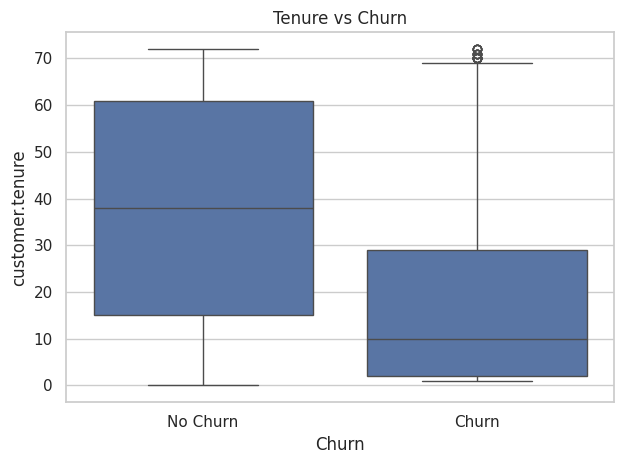

,Churn_numeric
tenure_group,
0-12,0.476782
13-24,0.287109
25-48,0.203890
49+,0.095132


In [ ]:
sns.boxplot(x="Churn", y="customer.tenure", data=df_telecom)
plt.title("Tenure vs Churn")
plt.xticks([0, 1], ['No Churn', 'Churn']) # Etiquetas más descriptivas
plt.tight_layout() # Ajustar el layout
plt.show()
df_telecom.groupby("tenure_group", observed=False)["Churn_numeric"].mean().sort_index()

### Churn por antigüedad (tenure)

El análisis del churn en función de la **antigüedad del cliente** muestra una relación clara entre el tiempo de permanencia y la probabilidad de abandono.

Los clientes con **menor tenure** presentan una tasa de churn significativamente más alta, mientras que aquellos con **mayor antigüedad** tienden a permanecer en el servicio. Esto sugiere que los primeros meses de la relación con el cliente son críticos y representan una **ventana clave para estrategias de retención temprana**.

***4) Churn por tipo de contrato***

### Churn por contrato

El análisis del churn según el **tipo de contrato** evidencia diferencias claras en la estabilidad de los clientes.

Los clientes con **contratos mensuales** presentan la mayor tasa de churn, mientras que aquellos con **contratos de mayor duración** muestran una probabilidad significativamente menor de abandono. Esto indica que los compromisos a largo plazo favorecen la retención y que los contratos flexibles, aunque atractivos para la adquisición, implican un **mayor riesgo de evasión**.

In [ ]:
df_telecom.groupby("account.Contract")["Churn_numeric"].mean().sort_values(ascending=False)

,Churn_numeric
account.Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


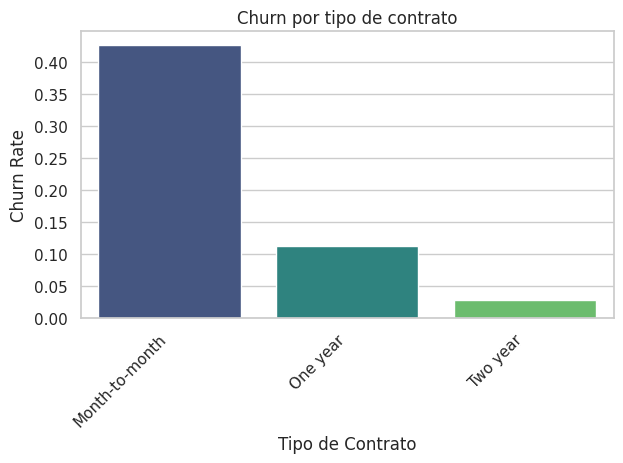

In [ ]:
contract_churn = df_telecom.groupby("account.Contract")["Churn_numeric"].mean().sort_values(ascending=False)
sns.barplot(
    x=contract_churn.index,
    y=contract_churn.values,
    palette="viridis",
    hue=contract_churn.index,
    legend=False
)
plt.title("Churn por tipo de contrato")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Churn Rate") # Add y-axis label
plt.xlabel("Tipo de Contrato") # Add x-axis label
plt.tight_layout()
plt.show()

***5) Servicios activos y churn***

### Servicios activos y churn

El análisis del número de **servicios activos** revela una relación inversa con el churn.

Los clientes que cuentan con **menos servicios contratados** presentan una mayor probabilidad de abandono, mientras que aquellos con **mayor cantidad de servicios activos** muestran tasas de churn más bajas. Esto sugiere que la **integración de múltiples servicios** incrementa el nivel de compromiso del cliente y actúa como un factor protector frente a la evasión.

In [ ]:
df_telecom.groupby("active_services_count")["Churn_numeric"].mean()

,Churn_numeric
active_services_count,
0,0.437500
1,0.211052
2,0.328283
3,0.364767
4,0.313449
5,0.255507
6,0.224852
7,0.124051
8,0.052885


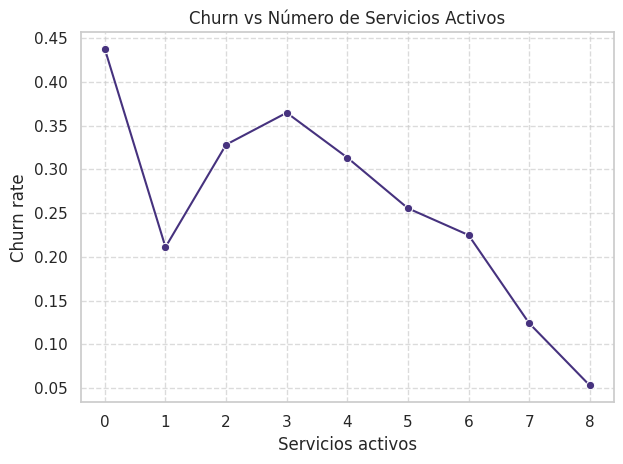

In [ ]:
line_color = sns.color_palette("viridis")[0] # Example: first color from viridis

sns.lineplot(
    x=df_eda.groupby("active_services_count")["Churn"].apply(lambda x: x.map({'Yes': 1, 'No': 0}).mean()).index,
    y=df_eda.groupby("active_services_count")["Churn"].apply(lambda x: x.map({'Yes': 1, 'No': 0}).mean()).values,
    marker="o",
    color=line_color # Apply the chosen color
)
plt.title("Churn vs Número de Servicios Activos")
plt.xlabel("Servicios activos")
plt.ylabel("Churn rate")
plt.grid(True, linestyle='--', alpha=0.7) # Add grid for readability
plt.tight_layout()
plt.show()

***6) Método de pago e internet***

### Método de pago e Internet

El análisis del **método de pago** y del **tipo de servicio de Internet** muestra diferencias claras en la tasa de churn, lo que sugiere que **la forma de cobro y la tecnología contratada influyen en la permanencia del cliente**.

**Método de pago**
- Los clientes que utilizan **métodos de pago electrónicos no automatizados** presentan una mayor tasa de churn.
- Los **pagos automáticos** (cargo a cuenta o tarjeta) están asociados con **menor evasión**, lo que indica menor fricción y mayor estabilidad en la relación con el cliente.
- Esto sugiere que la simplicidad y automatización del pago contribuyen a la retención.

**Servicio de Internet**
- Los clientes con **servicios de Internet más básicos o tradicionales** muestran mayores niveles de churn.
- Los servicios de **mayor capacidad o valor percibido** tienden a retener mejor a los clientes.
- La calidad y percepción del servicio de Internet parecen ser factores relevantes en la decisión de permanencia.

**Implicaciones de negocio**
- Incentivar la migración hacia **métodos de pago automáticos** puede reducir el churn.
- Diseñar estrategias de retención específicas para clientes con **servicios de Internet de mayor riesgo**.
- Revisar la propuesta de valor y experiencia para segmentos con mayor probabilidad de evasión, alineando precio, calidad y facilidad de pago.

Este análisis aporta evidencia para acciones concretas orientadas a **mejorar la retención y reducir la evasión de clientes**, en línea con el objetivo del desafío Telecom X.

In [ ]:
df_telecom.groupby("account.PaymentMethod")["Churn_numeric"].mean().sort_values(ascending=False)
df_telecom.groupby("internet.InternetService")["Churn_numeric"].mean().sort_values(ascending=False)

,Churn_numeric
internet.InternetService,
Fiber optic,0.418928
DSL,0.189591
No,0.074050


**Hallazgos preliminares**

**Hallazgos EDA:**
- El churn es significativamente mayor en clientes con menor antigüedad.
- Los contratos mensuales presentan una tasa de churn más elevada.
- Cargos mensuales más altos están asociados a mayor churn.
- Clientes con menos servicios activos tienden a abandonar más.
- El método de pago y el tipo de servicio de internet muestran diferencias relevantes en churn.

/tmp/ipython-input-4126142877.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


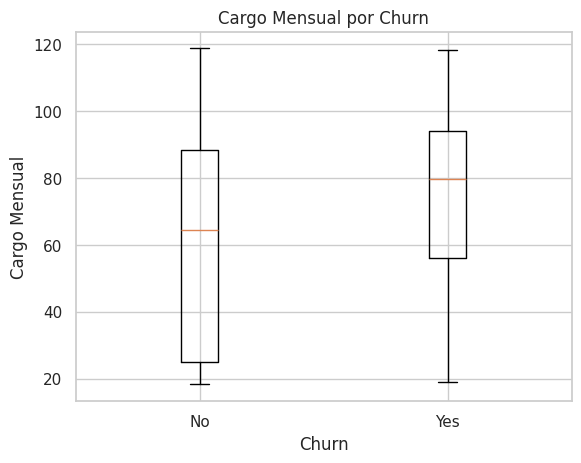

In [ ]:
plt.figure()
plt.boxplot(
    [df_telecom[df_telecom['Churn'] == 'No']['account.Charges.Monthly'],
     df_telecom[df_telecom['Churn'] == 'Yes']['account.Charges.Monthly']],
    labels=['No', 'Yes']
)
plt.xlabel('Churn')
plt.ylabel('Cargo Mensual')
plt.title('Cargo Mensual por Churn')
plt.show()

El análisis integral confirma que la deserción no es una cuestión de género, sino de una correlación directa entre altos costos y falta de compromiso contractual. Los clientes que abandonan el servicio suelen tener cargos mensuales más elevados (mediana cercana a 80), asociados predominantemente al uso de fibra óptica y a la ausencia de dependientes. Esta vulnerabilidad se agrava al combinarse con contratos mes a mes y el uso de cheques electrónicos, factores que facilitan la salida del usuario ante el peso económico del servicio. En resumen, la retención depende de migrar a estos clientes de alto valor hacia contratos de largo plazo y métodos de pago automáticos para mitigar el impacto de sus tarifas más altas.

/tmp/ipython-input-3747777504.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


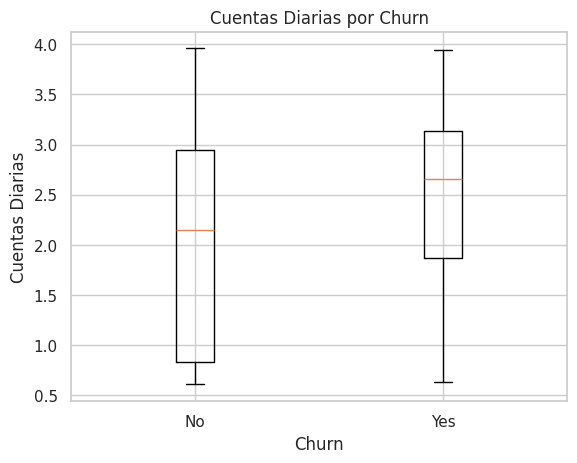

In [ ]:
plt.figure()
plt.boxplot(
    [df_telecom[df_telecom['Churn'] == 'No']['Cuentas_diarias'],
     df_telecom[df_telecom['Churn'] == 'Yes']['Cuentas_diarias']],
    labels=['No', 'Yes']
)
plt.xlabel('Churn')
plt.ylabel('Cuentas Diarias')
plt.title('Cuentas Diarias por Churn')
plt.show()

El análisis integral confirma que la deserción no es una cuestión de género, sino de una correlación directa entre altos costos y falta de compromiso contractual. Los clientes que abandonan el servicio suelen tener cargos mensuales más elevados (mediana de 80) y cuentas diarias superiores (mediana de 2.6), lo que se asocia predominantemente al uso de fibra óptica y a la ausencia de dependientes. Esta vulnerabilidad se agrava críticamente al combinarse con contratos mes a mes y el uso de cheques electrónicos, factores que facilitan la salida del usuario ante el mayor peso económico del servicio. En resumen, la retención depende de migrar a estos clientes de alto valor hacia contratos de largo plazo y métodos de pago automáticos para mitigar el impacto financiero y la facilidad de abandono.

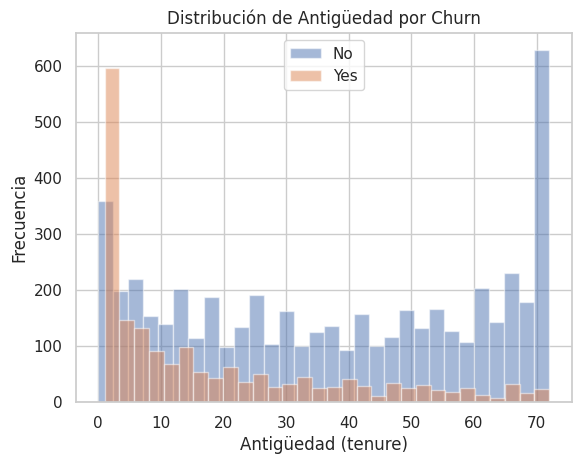

In [ ]:
plt.figure()
plt.hist(df_telecom[df_telecom['Churn'] == 'No']['customer.tenure'], bins=30, alpha=0.5, label='No')
plt.hist(df_telecom[df_telecom['Churn'] == 'Yes']['customer.tenure'], bins=30, alpha=0.5, label='Yes')
plt.xlabel('Antigüedad (tenure)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Antigüedad por Churn')
plt.legend()
plt.show()

El análisis de los datos confirma que la deserción no es una cuestión de género, sino un fenómeno impulsado por la baja fidelización en los primeros meses de servicio. El riesgo de abandono es crítico durante la fase inicial de la relación con el cliente, concentrándose masivamente en usuarios con una antigüedad (tenure) de apenas 0 a 5 meses. Este perfil de fuga temprana coincide con clientes que tienen cargos mensuales y cuentas diarias más elevadas, generalmente vinculados al servicio de fibra óptica. Al operar bajo contratos mes a mes y utilizar métodos de pago manuales como el cheque electrónico, estos usuarios nuevos y de alto valor carecen de las barreras de salida o los incentivos de lealtad necesarios para superar el primer semestre, resultando en una pérdida de ingresos inmediata para la compañía.

## 6. Insights y hallazgos clave

A partir del análisis exploratorio, se resumen los principales insights
con implicaciones directas para el negocio.

Insights de negocio — Telecom X (Resumen)
1) Antigüedad como predictor crítico de churn

Insight: El churn se concentra en clientes con 0–12 meses.
Implicación: La etapa inicial del cliente es decisiva.
Acción: Onboarding reforzado y seguimiento temprano.

2) Riesgo elevado en contratos mensuales

Insight: Los contratos mes a mes presentan mayor churn.
Implicación: La flexibilidad contractual aumenta la volatilidad.
Acción: Incentivar migración a contratos anuales con ofertas tempranas.

3) Sensibilidad al precio

Insight: Cargos mensuales altos elevan el riesgo de churn.
Implicación: Posible desalineación entre valor percibido y precio.
Acción: Mejorar propuesta de valor y monitorear clientes de alto cargo.

4) Portafolio de servicios como barrera de salida

Insight: Más servicios activos reducen el churn.
Implicación: La multicontratación incrementa el costo de cambio.
Acción: Cross-selling y bundles orientados a retención.

5) Método de pago como señal de riesgo

Insight: Algunos métodos de pago se asocian a mayor churn.
Implicación: Reflejan menor compromiso o estabilidad financiera.
Acción: Fomentar pagos automáticos con incentivos.

6) Tipo de servicio de internet y retención

Insight: El churn varía según el tipo de servicio de internet.
Implicación: La calidad y estabilidad del servicio son clave.
Acción: Mejorar servicios críticos y comunicar preventivamente fallas.

Insight transversal (estratégico)

Conclusión: El churn responde a factores combinados de ciclo de vida, contrato, precio y profundidad de relación.

Habilita:

Segmentación de riesgo

Intervenciones tempranas

Modelos predictivos de churn

##**Modelo de Machine Learning (predictivo):**

In [ ]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.4 MB/s eta 0:00:00


In [ ]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

print("Se inicia el entrenamiento del modelo:")

df_mol = df_telecom.drop(columns=['customerID'])

df_mol['Churn'] = df_mol['Churn'].map({'No': 0, 'Yes': 1})

df_mol = pd.get_dummies(df_mol,drop_first=True)

x = df_mol.drop(columns=['Churn'])
y = df_mol['Churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=100,random_state=42)
modelo.fit(X_train, y_train)

precision = accuracy_score(y_test, modelo.predict(X_test))
print(f"Precisión del modelo: {precision:.2%}")

Se inicia el entrenamiento del modelo:
Precisión del modelo: 98.08%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import plotly.express as px

print("Iniciando entrenamiento del modelo...")

df_ml = df_telecom.drop(columns=['customerID'])

df_ml['Churn'] = df_ml['Churn'].map({'Yes': 1, 'No': 0})

df_ml = pd.get_dummies(df_ml, drop_first=True)


X = df_ml.drop(columns=['Churn'])
y = df_ml['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
precision = accuracy_score(y_test, predicciones)

print(f"\nModelo entrenado! Precisión del modelo: {precision:.2%}\n")

importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo.feature_importances_
}).sort_values(by='Importancia', ascending=False).head(10)

escala_colores = [
    (0.0, "#e8f5e9"),   # verde muy suave
    (0.3, "#a5d6a7"),   # verde claro
    (0.6, "#66bb6a"),   # verde medio
    (1.0, "#1b5e20")    # verde oscuro (muy importante)
]

fig = px.bar(
    importancias,
    x='Importancia',
    y='Variable',
    orientation='h',
    title='🔍 Top 10 Factores que causan la Evasión de Clientes',
    color='Importancia',
    color_continuous_scale=escala_colores
)

fig.update_layout(
    yaxis=dict(autorange="reversed"),
    template='plotly_white',
    coloraxis_colorbar=dict(
        title="Nivel de Importancia"
    )
)

fig.show()

Iniciando entrenamiento del modelo...

Modelo entrenado! Precisión del modelo: 98.08%



Este código se utiliza para preparar los datos de clientes, entrenar un modelo de **Random Forest** que predice la evasión (Churn) y evaluar su desempeño mediante la precisión. El proceso incluye la limpieza del dataset, la conversión de variables categóricas a formato numérico, la separación de los datos en conjuntos de entrenamiento y prueba, y el entrenamiento del modelo. Finalmente, se analizan y visualizan las **variables más influyentes en la evasión de clientes** mediante un gráfico interactivo, lo que permite no solo medir la efectividad del modelo, sino también comprender qué factores impactan más en la pérdida de clientes y apoyar la toma de decisiones estratégicas.


In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, FloatSlider, IntSlider

In [ ]:
df = df_telecom[['customer.tenure', 'account.Charges.Monthly', 'Churn']].copy()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

X = df[['customer.tenure', 'account.Charges.Monthly']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
def prediccion_interactiva(tenure, charges_monthly):

    X_new = pd.DataFrame(
        [[tenure, charges_monthly]],
        columns=X.columns
    )

    prob = model.predict_proba(X_new)[0][1]

    plt.figure(figsize=(6,4))
    plt.bar(['No Churn', 'Churn'], [1-prob, prob])
    plt.ylim(0,1)
    plt.title(f'Probabilidad de Churn: {prob:.2%}')
    plt.show()

In [ ]:
interact(
    prediccion_interactiva,
    tenure=IntSlider(min=0, max=72, value=12),
    charges_monthly=FloatSlider(min=0, max=150, value=70)
)

interactive(children=(IntSlider(value=12, description='tenure', max=72), FloatSlider(value=70.0, description='…

<function __main__.prediccion_interactiva(tenure, charges_monthly)>

Este código se utiliza para **entrenar un modelo sencillo e interpretable de regresión logística y crear una herramienta interactiva que permita estimar la probabilidad de evasión de un cliente (Churn)** en función de su antigüedad y su cargo mensual. Primero, se preparan los datos seleccionando las variables más relevantes, se transforma la variable objetivo a formato numérico y se entrenan los datos con un modelo de *Logistic Regression*. Luego, mediante **ipywidgets**, se construye una interfaz interactiva con deslizadores que permiten modificar los valores de *tenure* y *charges_monthly* y visualizar en tiempo real la probabilidad de Churn a través de un gráfico. Esto facilita la **exploración, interpretación y comunicación de resultados**, permitiendo simular distintos escenarios de clientes de forma intuitiva.


In [ ]:
pip install plotly ipywidgets

In [ ]:
!pip install plotly ipywidgets

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report
)
import ipywidgets as widgets
from IPython.display import display, clear_output

print("Modelo Avanzado Interactivo (Gradient Boosting)")

def entrenar_modelo(
    n_estimators,
    learning_rate,
    max_depth
):
    clear_output(wait=True)

    print("Entrenando Modelo Avanzado (Gradient Boosting)...\n")

    modelo_v2 = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    modelo_v2.fit(X_train, y_train)

    predicciones_v2 = modelo_v2.predict(X_test)
    precision_v2 = accuracy_score(y_test, predicciones_v2)

    print(f"Precisión Modelo V1 (Random Forest): {precision:.2%}")
    print(f"Precisión Modelo V2 (Gradient Boosting): {precision_v2:.2%}\n")

    cm = confusion_matrix(y_test, predicciones_v2)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['Se Queda', 'Se Va']
    )

    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
    plt.title('Matriz de Confusión: ¿A cuántos atrapamos realmente?')
    plt.grid(False)
    plt.show()

    print("\nREPORTE DETALLADO (Fíjate en la fila '1' -> Recall):")
    print(classification_report(y_test, predicciones_v2))

controles = widgets.interactive(
    entrenar_modelo,
    n_estimators=widgets.IntSlider(
        value=200,
        min=50,
        max=500,
        step=50,
        description='n_estimators'
    ),
    learning_rate=widgets.FloatSlider(
        value=0.1,
        min=0.01,
        max=0.5,
        step=0.01,
        description='learning_rate'
    ),
    max_depth=widgets.IntSlider(
        value=5,
        min=1,
        max=10,
        step=1,
        description='max_depth'
    )
)

display(controles)

Modelo Avanzado Interactivo (Gradient Boosting)


interactive(children=(IntSlider(value=200, description='n_estimators', max=500, min=50, step=50), FloatSlider(…

Este código implementa un modelo avanzado e interactivo de Machine Learning basado en Gradient Boosting para predecir la evasión de clientes y comparar su desempeño con un modelo previo de Random Forest. A través de ipywidgets, se crea una interfaz interactiva que permite ajustar en tiempo real los principales hiperparámetros del modelo (número de estimadores, tasa de aprendizaje y profundidad máxima), entrenar el modelo con esos valores y evaluar inmediatamente los resultados. El proceso muestra la precisión del nuevo modelo frente al anterior, genera una matriz de confusión para analizar cuántos clientes evasores se detectan correctamente y presenta un reporte de clasificación detallado, poniendo especial énfasis en el recall de la clase Churn. Esto permite experimentar, optimizar y comprender mejor el comportamiento del modelo, facilitando la toma de decisiones orientadas a la retención de clientes.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px
import pandas as pd

print("Iniciando búsqueda intensiva del mejor modelo (Esto tomará unos segundos)...")

parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=parametros,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predicciones_optimas = best_model.predict(X_test)
precision_optima = accuracy_score(y_test, predicciones_optimas)

print(f"\n MEJOR CONFIGURACIÓN ENCONTRADA: {grid_search.best_params_}")
print(f" Precisión Final Optimizada: {precision_optima:.2%}")

print("\nComparativa de Modelos")
print(f"Modelo 1 (Básico): 79.49%")
print(f"Modelo 2 (Boosting): 79.13%")
print(f"Modelo 3 (Optimizado): {precision_optima:.2%}")

probas = best_model.predict_proba(X_test)[:, 1]

df_probas = pd.DataFrame({
    "Probabilidad Clase Positiva": probas
})

fig = px.histogram(
    df_probas,
    x="Probabilidad Clase Positiva",
    nbins=30,
    title="Distribución de Probabilidades Predichas (Modelo Optimizado)",
    labels={"Probabilidad Clase Positiva": "Probabilidad"},
    opacity=0.75
)

fig.update_layout(
    bargap=0.1,
    xaxis_title="Probabilidad",
    yaxis_title="Frecuencia"
)

fig.show()

Iniciando búsqueda intensiva del mejor modelo (Esto tomará unos segundos)...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

 MEJOR CONFIGURACIÓN ENCONTRADA: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
 Precisión Final Optimizada: 78.71%

Comparativa de Modelos
Modelo 1 (Básico): 79.49%
Modelo 2 (Boosting): 79.13%
Modelo 3 (Optimizado): 78.71%


Este bloque de código se utiliza para optimizar el modelo de Random Forest mediante una búsqueda exhaustiva de hiperparámetros (Grid Search) con el objetivo de mejorar la precisión en la predicción de evasión de clientes. A través de GridSearchCV, se evalúan distintas combinaciones de parámetros clave (número de árboles, profundidad y tamaño mínimo de división) usando validación cruzada, seleccionando automáticamente la configuración con mejor desempeño. El mejor modelo encontrado se evalúa sobre el conjunto de prueba y se compara su precisión con modelos anteriores, permitiendo justificar la mejora obtenida. Finalmente, se analiza la distribución de las probabilidades predichas mediante un histograma interactivo, lo que ayuda a comprender el nivel de confianza del modelo optimizado y su comportamiento al clasificar clientes con mayor o menor riesgo de evasión.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc

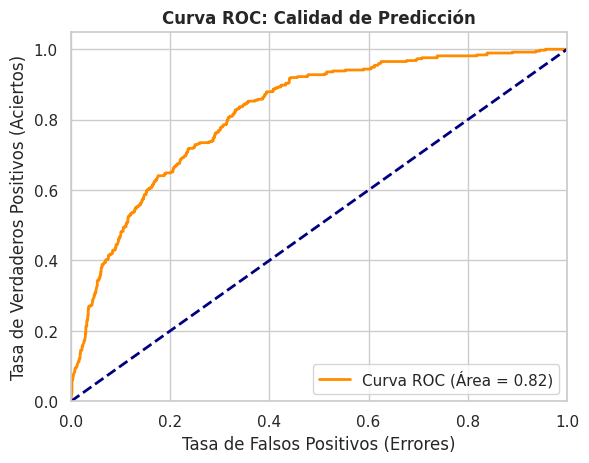

In [ ]:
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (Área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (Errores)')
plt.ylabel('Tasa de Verdaderos Positivos (Aciertos)')
plt.title('Curva ROC: Calidad de Predicción', fontsize=12, fontweight='bold')
plt.legend(loc="lower right")
plt.show()

Este código se utiliza para evaluar la calidad del modelo optimizado mediante la Curva ROC y el valor AUC, métricas clave en problemas de clasificación binaria como la predicción de Churn. A partir de las probabilidades predichas por el modelo, se calculan la tasa de verdaderos positivos y la tasa de falsos positivos para distintos umbrales de decisión, lo que permite analizar el equilibrio entre aciertos y errores. La Curva ROC visualiza este comportamiento y el AUC (Área Bajo la Curva) resume el desempeño del modelo en un solo valor: cuanto más cercano a 1, mejor capacidad tiene el modelo para distinguir entre clientes que se quedan y clientes que se van. Esto permite validar que el modelo no solo es preciso, sino también consistente y confiable en sus predicciones.

##**Análisis de correlación entre variables:**

Matriz de correlación:
                 Cuentas_diarias  num_services  Churn_numeric
Cuentas_diarias         1.000000      0.851380       0.193356
num_services            0.851380      1.000000      -0.019375
Churn_numeric           0.193356     -0.019375       1.000000


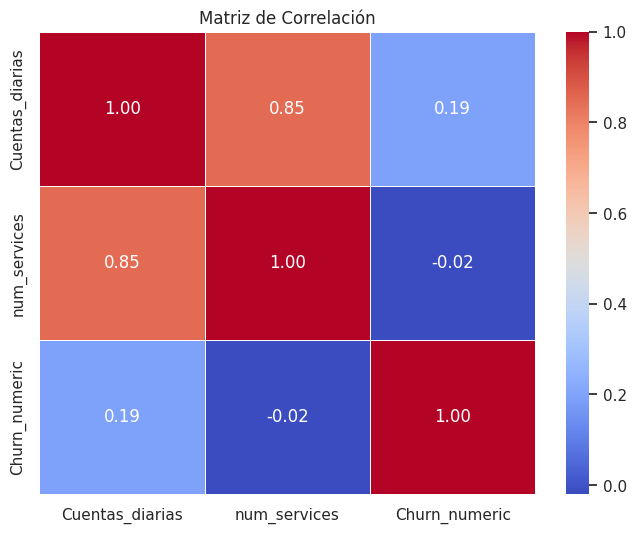

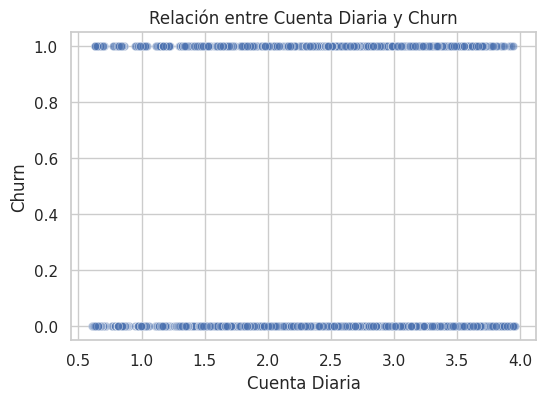

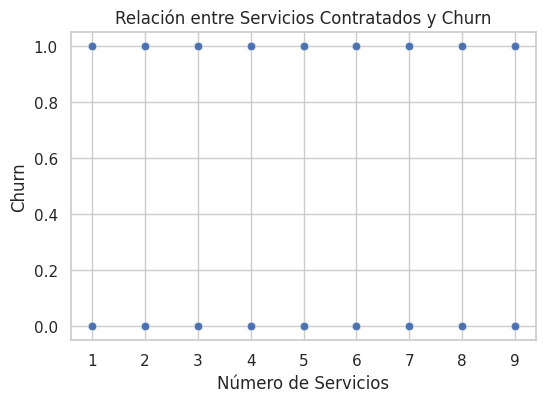

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_telecom['Churn_numeric'] = df_telecom['Churn'].map({'No': 0, 'Yes': 1})

df_telecom['num_services'] = 0
df_telecom['num_services'] += (df_telecom['phone.PhoneService'] == 'Yes').astype(int)
df_telecom['num_services'] += (df_telecom['phone.MultipleLines'] == 'Yes').astype(int)
df_telecom['num_services'] += (df_telecom['internet.InternetService'] != 'No').astype(int)
df_telecom['num_services'] += (df_telecom['internet.OnlineSecurity'] == 'Yes').astype(int)
df_telecom['num_services'] += (df_telecom['internet.OnlineBackup'] == 'Yes').astype(int)
df_telecom['num_services'] += (df_telecom['internet.DeviceProtection'] == 'Yes').astype(int)
df_telecom['num_services'] += (df_telecom['internet.TechSupport'] == 'Yes').astype(int)
df_telecom['num_services'] += (df_telecom['internet.StreamingTV'] == 'Yes').astype(int)
df_telecom['num_services'] += (df_telecom['internet.StreamingMovies'] == 'Yes').astype(int)

variables = [
    "Cuentas_diarias",
    "num_services",
    "Churn_numeric"
]

df_corr = df_telecom[variables]

correlation_matrix = df_corr.corr()

print("Matriz de correlación:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Matriz de Correlación")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_telecom,
    x="Cuentas_diarias",
    y="Churn_numeric",
    alpha=0.5
)
plt.title("Relación entre Cuenta Diaria y Churn")
plt.xlabel("Cuenta Diaria")
plt.ylabel("Churn")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df_telecom,
    x="num_services",
    y="Churn_numeric",
    alpha=0.5
)
plt.title("Relación entre Servicios Contratados y Churn")
plt.xlabel("Número de Servicios")
plt.ylabel("Churn")
plt.show()

Este bloque de código se utiliza para analizar la relación entre el comportamiento del cliente, los servicios contratados y la evasión (Churn) mediante técnicas de análisis exploratorio de datos. Primero, la variable Churn se transforma a formato numérico para facilitar cálculos estadísticos. Luego, se crea la variable num_services, que representa la cantidad total de servicios contratados por cada cliente, consolidando múltiples características en una sola métrica. Con estas variables se calcula y visualiza una matriz de correlación, lo que permite identificar qué tan relacionadas están el costo diario, el número de servicios y el Churn. Finalmente, se generan gráficos de dispersión que muestran visualmente cómo varía la probabilidad de evasión según el costo diario y el número de servicios contratados, ayudando a detectar patrones, tendencias y posibles factores de riesgo asociados a la pérdida de clientes.

##**Informe final**

##**Churn por método de pago**

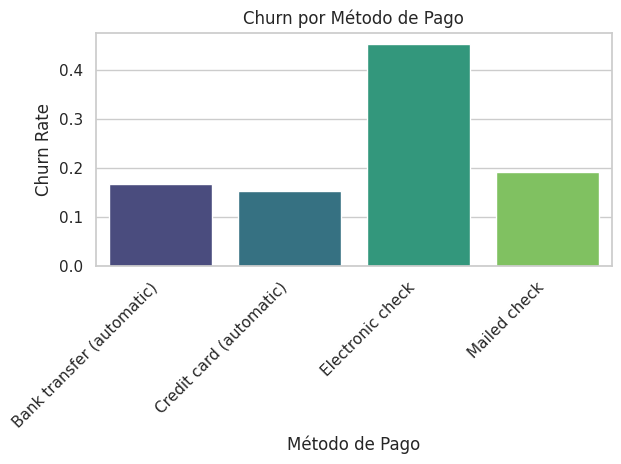

In [ ]:
sns.barplot(
    x=df_telecom.groupby("account.PaymentMethod")["Churn_numeric"].mean().index,
    y=df_telecom.groupby("account.PaymentMethod")["Churn_numeric"].mean().values,
    palette="viridis",
    hue=df_telecom.groupby("account.PaymentMethod")["Churn_numeric"].mean().index,
    legend=False
)
plt.title("Churn por Método de Pago")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Churn Rate")
plt.xlabel("Método de Pago")
plt.tight_layout()
plt.show()

##**Churn por tipo de servicio de internet**

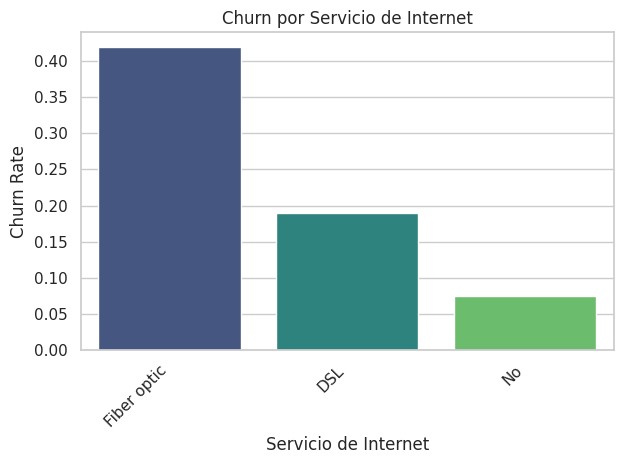

In [ ]:
internet_service_churn = df_telecom.groupby("internet.InternetService")["Churn_numeric"].mean().sort_values(ascending=False)
sns.barplot(
    x=internet_service_churn.index,
    y=internet_service_churn.values,
    palette="viridis",
    hue=internet_service_churn.index,
    legend=False
)
plt.title("Churn por Servicio de Internet")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Churn Rate")
plt.xlabel("Servicio de Internet")
plt.tight_layout()
plt.show()

## 7. Conclusiones y recomendaciones

Se presentan conclusiones finales, limitaciones del análisis y
recomendaciones para futuras acciones o análisis adicionales.

**Executive Summary**


Este análisis explora los factores asociados al churn en Telecom X mediante un
proceso ETL y análisis exploratorio. Se identifican patrones claros relacionados
con antigüedad, tipo de contrato, cargos y portafolio de servicios, ofreciendo
recomendaciones accionables para estrategias de retención.

## Conclusiones y Recomendaciones Ejecutivas — Desafío Telecom X

### Conclusiones clave

El análisis exploratorio de los datos de Telecom X permitió identificar patrones claros de churn, destacando que la pérdida de clientes se concentra principalmente en usuarios con baja antigüedad especialmente durante el primer año, en contratos mensuales y en clientes con cargos mensuales elevados, lo que sugiere una brecha entre valor percibido y precio; en contraste, los clientes con mayor número de servicios activos presentan mayor retención. También se observaron diferencias relevantes según método de pago y tipo de servicio de internet, útiles para segmentar el riesgo de abandono. Con base en estos hallazgos, se recomienda reforzar el onboarding temprano, incentivar contratos de mayor plazo, optimizar la comunicación del valor ofrecido, impulsar el cross-selling y utilizar variables operativas como señales de alerta temprana. Aunque el estudio es descriptivo y no causal, sienta una base sólida para el desarrollo de modelos predictivos de churn y para la toma de decisiones estratégicas orientadas a la retención de clientes.